In [1]:
import numpy as np 
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as font_manager
from matplotlib import rc
   
# 한글폰트작업
# window의 폰트 위치 -> C:/Windows/Fonts/NGULIM.TTF
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/NGULIM.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# <font color = 4247D6> Data Set

In [2]:
df = pd.read_csv('이상치_제거_.csv')
df

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
0,2020-03-04 0:00,489,116,631,OK
1,2020-03-04 0:00,433,78,609,OK
2,2020-03-04 0:00,464,154,608,OK
3,2020-03-04 0:00,379,212,606,OK
4,2020-03-04 0:00,798,1736,604,OK
...,...,...,...,...,...
835195,2020-04-30 23:59,755,1743,318,OK
835196,2020-04-30 23:59,385,206,317,OK
835197,2020-04-30 23:59,465,148,316,OK
835198,2020-04-30 23:59,467,0,314,OK


In [3]:
df.replace({'TAG': {'OK': 1, 'NG': 0}}, inplace=True)
df

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
0,2020-03-04 0:00,489,116,631,1
1,2020-03-04 0:00,433,78,609,1
2,2020-03-04 0:00,464,154,608,1
3,2020-03-04 0:00,379,212,606,1
4,2020-03-04 0:00,798,1736,604,1
...,...,...,...,...,...
835195,2020-04-30 23:59,755,1743,318,1
835196,2020-04-30 23:59,385,206,317,1
835197,2020-04-30 23:59,465,148,316,1
835198,2020-04-30 23:59,467,0,314,1


In [4]:
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tcn import TCN, tcn_full_summary
from keras.layers import Dropout
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
df['STD_DT'] = df['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d %H:%M:%S'))

In [7]:
df = df.set_index(['STD_DT'])
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
STD_DT,,,,
2020-03-04 00:00:00,489,116,631,1
2020-03-04 00:00:00,433,78,609,1
2020-03-04 00:00:00,464,154,608,1
2020-03-04 00:00:00,379,212,606,1
2020-03-04 00:00:00,798,1736,604,1
...,...,...,...,...
2020-04-30 23:59:00,755,1743,318,1
2020-04-30 23:59:00,385,206,317,1
2020-04-30 23:59:00,465,148,316,1


In [10]:
df_2 = pd.read_csv('사후확률_1.csv')
df_2

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG,predict
0,2020-04-02 00:01:00,454,149,728,0,0
1,2020-04-02 00:01:00,463,0,727,0,0
2,2020-04-02 00:01:00,496,166,725,1,0
3,2020-04-02 00:01:00,389,203,724,0,0
4,2020-04-02 00:01:00,780,1749,723,1,1
...,...,...,...,...,...,...
417585,2020-04-30 23:59:00,755,1743,318,1,1
417586,2020-04-30 23:59:00,385,206,317,1,1
417587,2020-04-30 23:59:00,465,148,316,1,1
417588,2020-04-30 23:59:00,467,0,314,1,1


In [11]:
df_1 = pd.read_csv('사후확률_2.csv')
df_1

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG,predict
0,2020-03-04 00:01:00,507,128,596,1,1
1,2020-03-04 00:01:00,408,66,595,1,1
2,2020-03-04 00:01:00,474,138,594,1,1
3,2020-03-04 00:01:00,358,201,592,1,1
4,2020-03-04 00:01:00,740,1740,590,1,1
...,...,...,...,...,...,...
417585,2020-04-01 23:59:00,786,1759,748,1,1
417586,2020-04-01 23:59:00,417,178,747,0,1
417587,2020-04-01 23:59:00,469,195,745,1,1
417588,2020-04-01 23:59:00,412,97,744,0,1


In [13]:
df_predict = pd.concat([df_1, df_2])
df_predict

,STD_DT,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG,predict
0,2020-03-04 00:01:00,507,128,596,1,1
1,2020-03-04 00:01:00,408,66,595,1,1
2,2020-03-04 00:01:00,474,138,594,1,1
3,2020-03-04 00:01:00,358,201,592,1,1
4,2020-03-04 00:01:00,740,1740,590,1,1
...,...,...,...,...,...,...
417585,2020-04-30 23:59:00,755,1743,318,1,1
417586,2020-04-30 23:59:00,385,206,317,1,1
417587,2020-04-30 23:59:00,465,148,316,1,1
417588,2020-04-30 23:59:00,467,0,314,1,1


In [19]:
df_accuracy = df_predict[['MELT_TEMP','MOTORSPEED','MELT_WEIGHT', 'predict']]
df = df_predict[['MELT_TEMP','MOTORSPEED','MELT_WEIGHT', 'TAG']]

In [20]:
df_accuracy

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,predict
0,507,128,596,1
1,408,66,595,1
2,474,138,594,1
3,358,201,592,1
4,740,1740,590,1
...,...,...,...,...
417585,755,1743,318,1
417586,385,206,317,1
417587,465,148,316,1
417588,467,0,314,1


In [21]:
df

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,TAG
0,507,128,596,1
1,408,66,595,1
2,474,138,594,1
3,358,201,592,1
4,740,1740,590,1
...,...,...,...,...
417585,755,1743,318,1
417586,385,206,317,1
417587,465,148,316,1
417588,467,0,314,1


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import *

In [22]:
from sklearn.model_selection import train_test_split

X = df_accuracy.drop('predict',axis=1)  
Y = df_accuracy[['predict']]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [23]:
from sklearn.model_selection import train_test_split

X_1 = df.drop('TAG',axis=1)  
Y_1 = df[['TAG']]


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=1)

In [205]:
reg_tree = DecisionTreeRegressor(criterion="mse", min_samples_leaf=10000, random_state=123)
reg_tree.fit(X_train, y_train)

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', min_samples_leaf=10000, random_state=123)

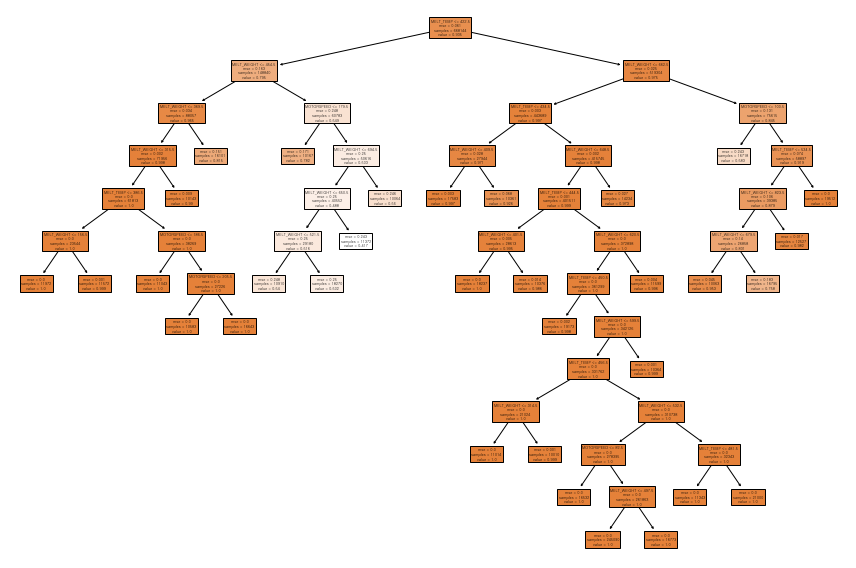

In [206]:
features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('tree___1.png', dpi=300, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

precision : 0.79112
recall : 0.98620
f1-score : 0.87796
accuracy : 0.78381
0.7838070835029575
[[  1033  34295]
 [  1817 129891]]



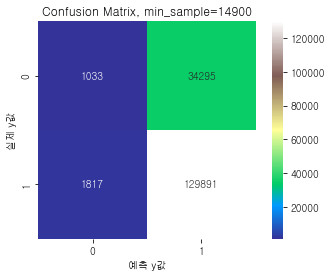

In [207]:
tmp_pred = [] 
tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))

p = precision_score(y_test_1, tmp_pred)
print('precision : {:.5f}'.format(p))
r = recall_score(y_test_1, tmp_pred)
print('recall : {:.5f}'.format(r))
f1 = f1_score(y_test_1, tmp_pred)
print('f1-score : {:.5f}'.format(f1))        
acc = accuracy_score(y_test_1, tmp_pred) 
print('accuracy : {:.5f}'.format(acc))
print(acc)

confusion_dt = confusion_matrix(y_test_1, tmp_pred)
print(confusion_dt)
print()
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("Confusion Matrix, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
#     plt.savefig('사후확률_min_{}_수정_1.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [121]:
features = X.columns.tolist()
target = Y.columns.tolist()

In [122]:
target

['predict']

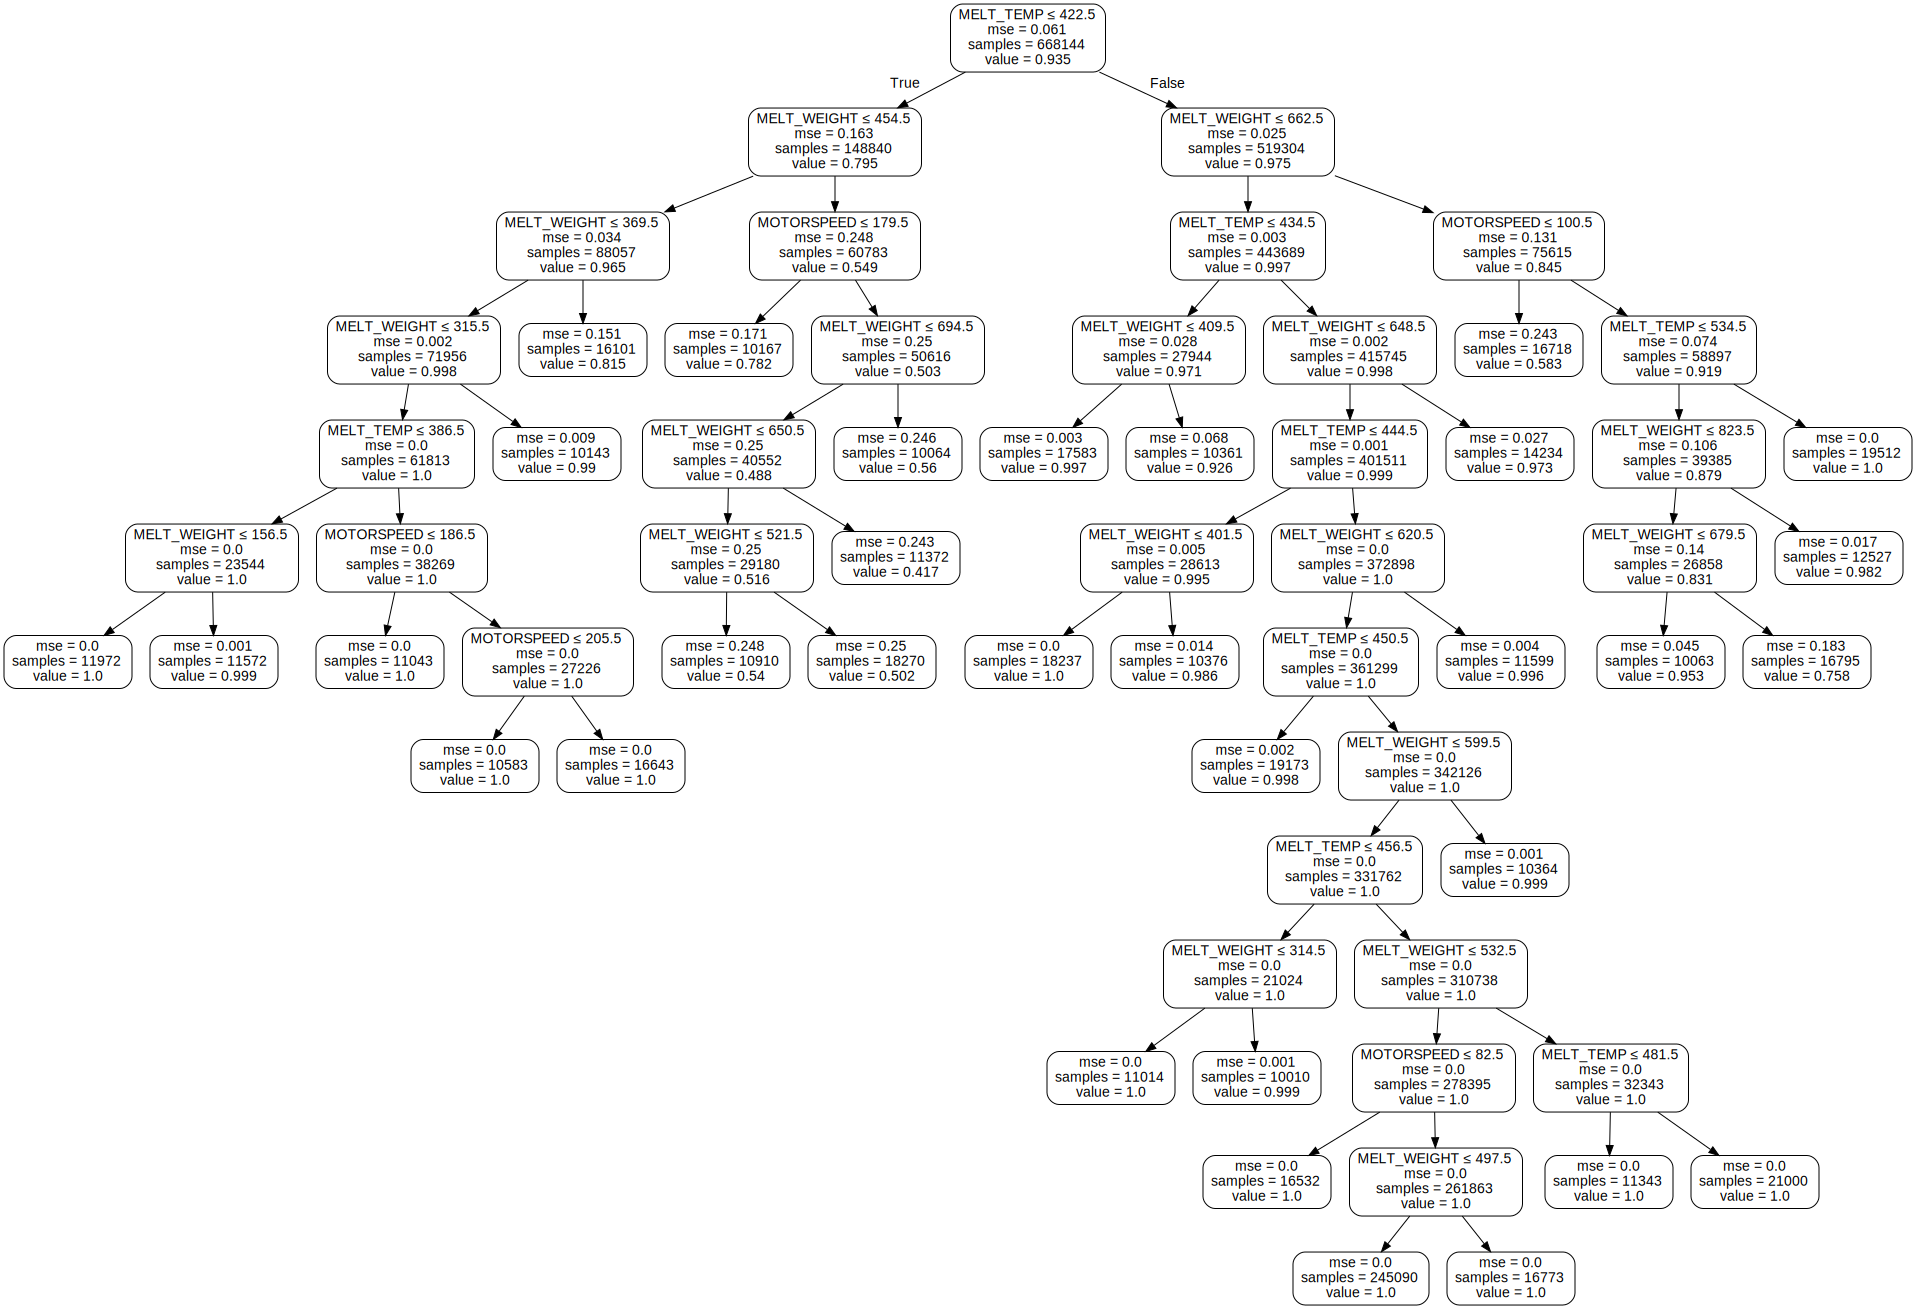

In [124]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(reg_tree,   # 의사결정나무 모형 대입
                           out_file = None,  # file로 변환할 것인가
                           feature_names = features,  # feature 이름
                           class_names = target,  # target 이름
#                            filled = True,           # 그림에 색상을 넣을것인가
                           rounded = True,          # 반올림을 진행할 것인가
                           special_characters = True, # 특수문자를 사용하나
                           impurity=True) 

graph = graphviz.Source(dot_data)              
# from IPython.core.display import Image
# Image(filename='./test.png')
graph

# graph.write_png('tree_with_path.png')

In [76]:
graph.render(filename='min_10000_사후확률', directory='./', format='png')

'min_10000_사후확률.png'

In [77]:
reg_tree = DecisionTreeRegressor(criterion="mse", min_samples_leaf=10000, random_state=123)
reg_tree.fit(X_train_1, y_train_1)

C:\Users\islab\anaconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', min_samples_leaf=10000, random_state=123)

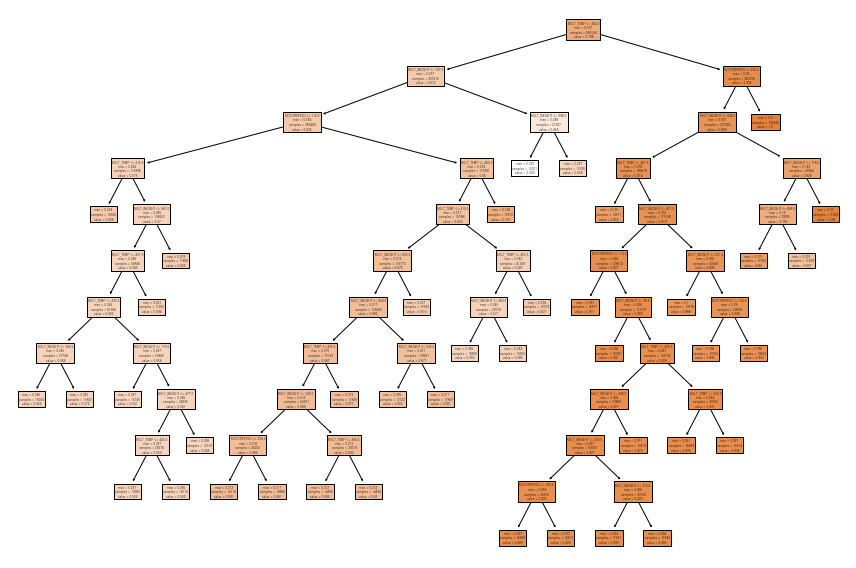

In [78]:
features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('tree___1.png', dpi=300, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [114]:
features = X_1.columns.tolist()
target = Y_1.columns.tolist()

In [115]:
target

['TAG']

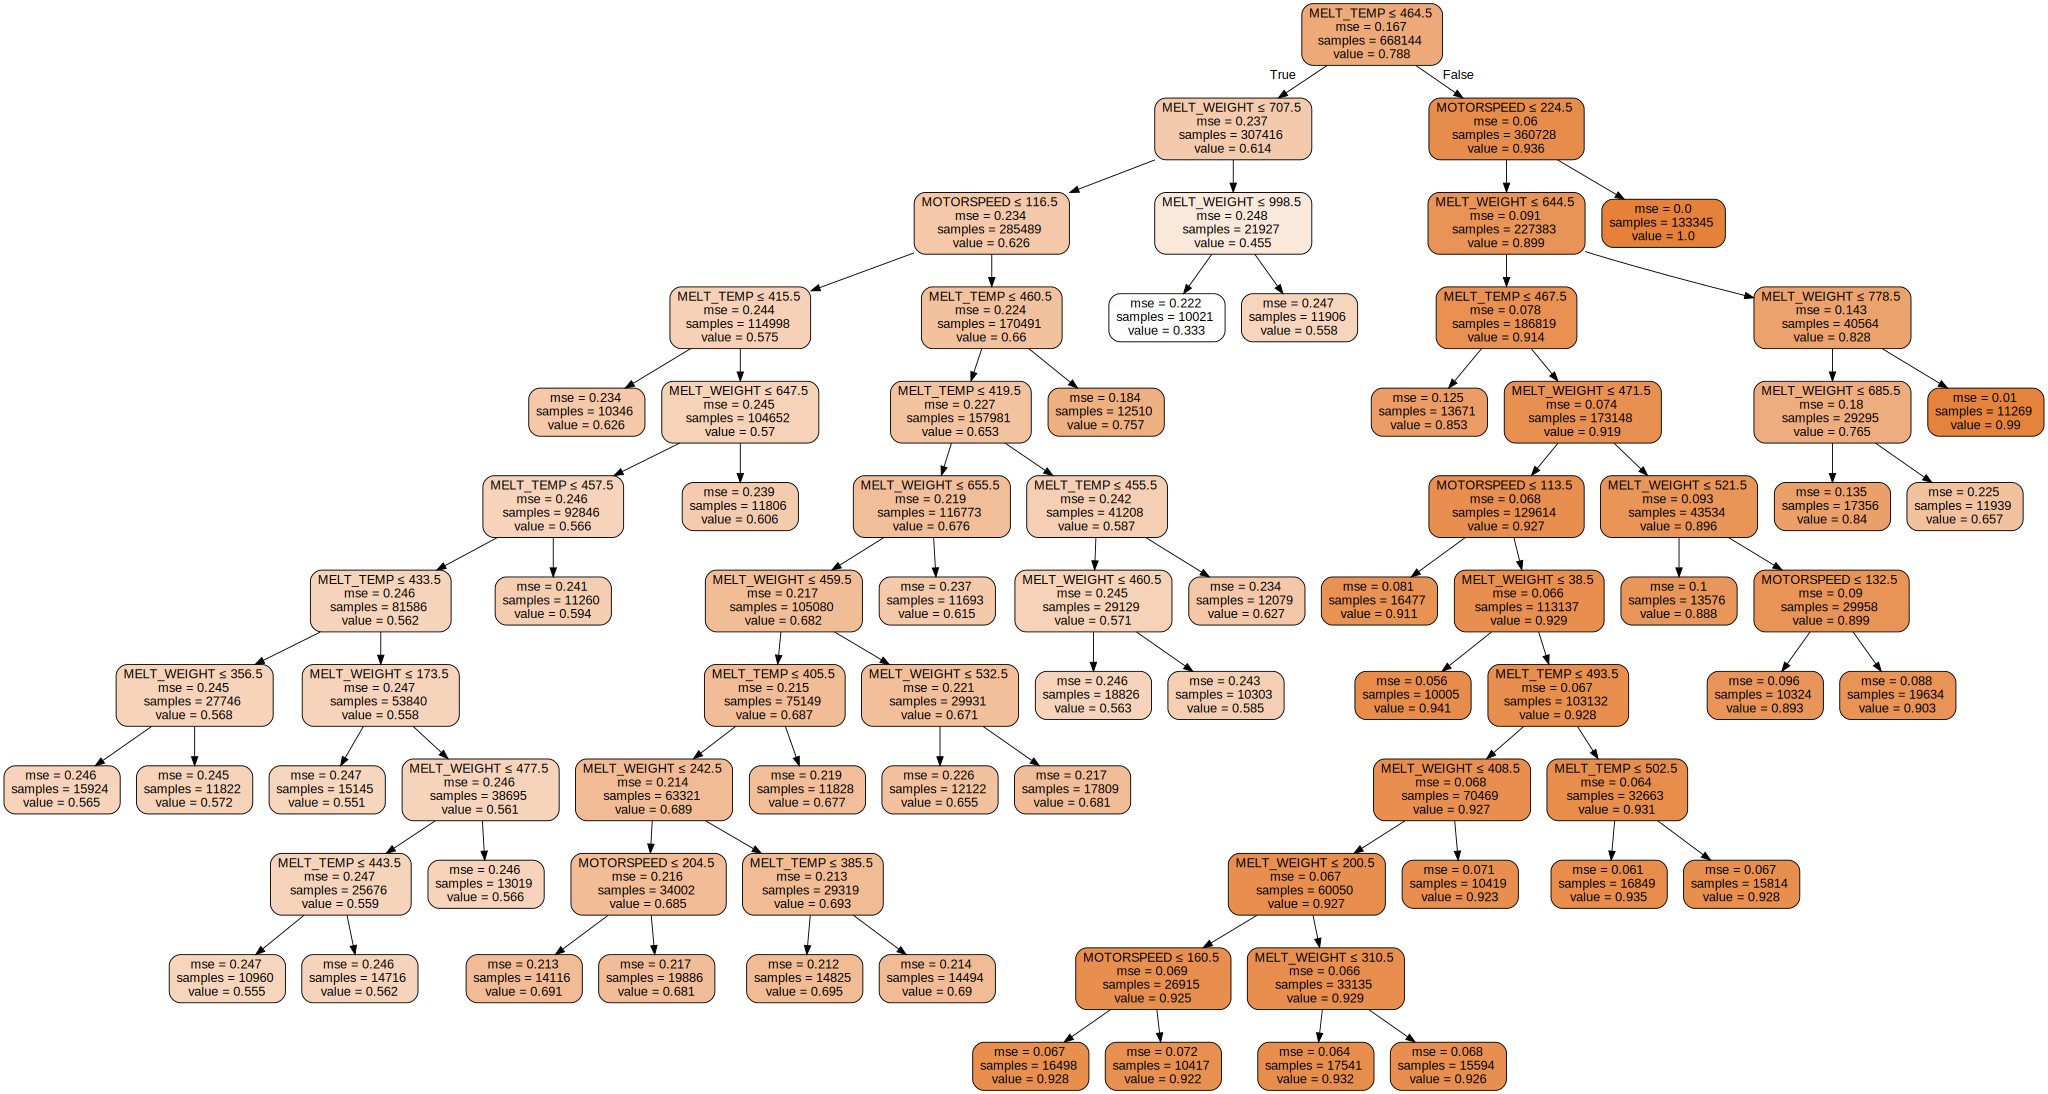

In [80]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(reg_tree,   # 의사결정나무 모형 대입
                           out_file = None,  # file로 변환할 것인가
                           feature_names = features,  # feature 이름
                           class_names = target,  # target 이름
                           filled = True,           # 그림에 색상을 넣을것인가
                           rounded = True,          # 반올림을 진행할 것인가
                           special_characters = True, # 특수문자를 사용하나
                           impurity=True) 

graph = graphviz.Source(dot_data)              
# from IPython.core.display import Image
# Image(filename='./test.png')
graph

# graph.write_png('tree_with_path.png')

In [81]:
graph.render(filename='min_10000', directory='./', format='png')

'min_10000.png'

precision : 0.79661
recall : 0.95254
f1-score : 0.86763
accuracy : 0.77082
0.7708158720275868
[[  3297  32031]
 [  6251 125457]]



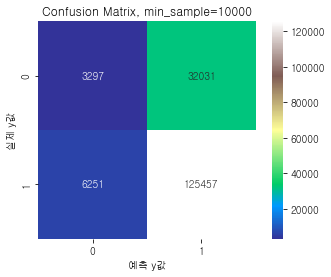

In [37]:
tmp_pred = [] 
tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))

p = precision_score(y_test_1, tmp_pred)
print('precision : {:.5f}'.format(p))
r = recall_score(y_test_1, tmp_pred)
print('recall : {:.5f}'.format(r))
f1 = f1_score(y_test_1, tmp_pred)
print('f1-score : {:.5f}'.format(f1))        
acc = accuracy_score(y_test_1, tmp_pred) 
print('accuracy : {:.5f}'.format(acc))
print(acc)

confusion_dt = confusion_matrix(y_test_1, tmp_pred)
print(confusion_dt)
print()
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("Confusion Matrix, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
#     plt.savefig('사후확률_min_{}_수정_1.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [229]:
cla_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10000, random_state=123)
cla_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10000,
                       random_state=123)

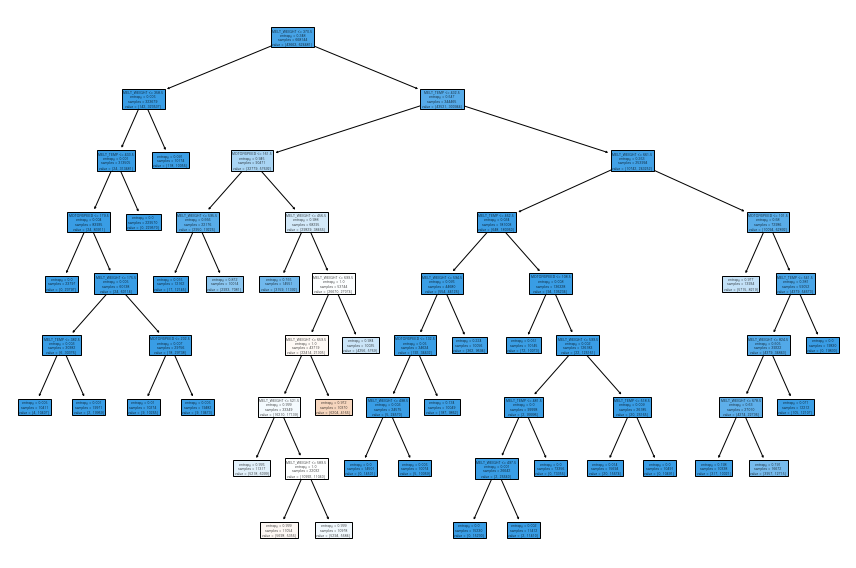

In [217]:
features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(cla_tree, feature_names=features, filled=True)
plt.savefig('tree1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

precision : 0.79321
recall : 0.97392
f1-score : 0.87433
accuracy : 0.77924
0.779239205919682
[[  1888  33440]
 [  3435 128273]]
0.9465579710144928



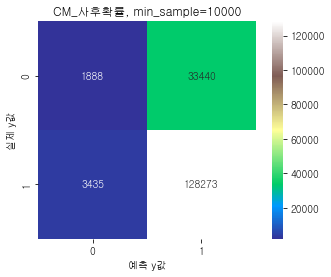

In [230]:
y_test_pred = cla_tree.predict(X_test)
y_train_pred = cla_tree.predict(X_train)

p = precision_score(y_test_1, y_test_pred)
print('precision : {:.5f}'.format(p))
r = recall_score(y_test_1, y_test_pred)
print('recall : {:.5f}'.format(r))
f1 = f1_score(y_test_1, y_test_pred)
print('f1-score : {:.5f}'.format(f1))
acc = accuracy_score(y_test_1, y_test_pred) 
print('accuracy : {:.5f}'.format(acc))
print(acc)

confusion_dt = confusion_matrix(y_test_1, y_test_pred)
print(confusion_dt)
print(confusion_dt[0][1] / (confusion_dt[0][0] + confusion_dt[0][1]))
print()
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("CM_사후확률, min_sample=10000", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
#     plt.savefig('사후확률_min_{}_수정_1.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [219]:
features = X.columns.tolist()
target = Y.columns.tolist()

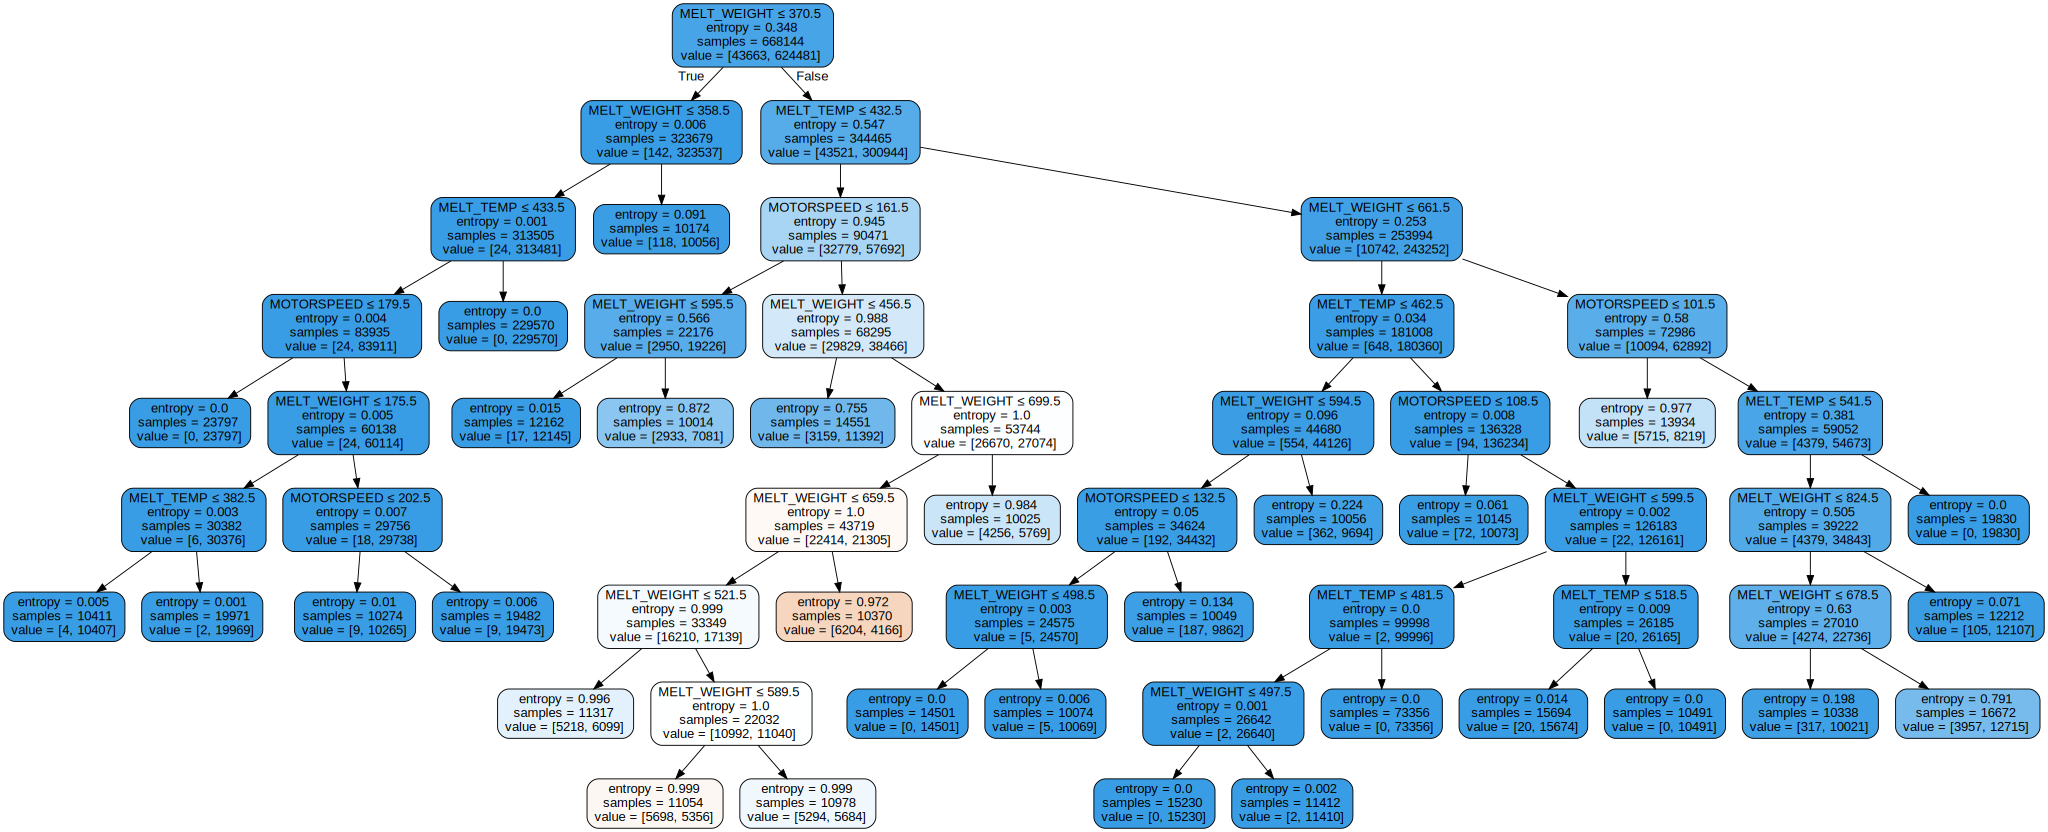

In [220]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(cla_tree,   # 의사결정나무 모형 대입
                           out_file = None,  # file로 변환할 것인가
                           feature_names = features,  # feature 이름
#                            class_names = target,  # target 이름
                           filled = True,           # 그림에 색상을 넣을것인가
                           rounded = True,          # 반올림을 진행할 것인가
                           special_characters = True, # 특수문자를 사용하나
                           impurity=True) 

graph = graphviz.Source(dot_data)              
# from IPython.core.display import Image
# Image(filename='./test.png')
graph

# graph.write_png('tree_with_path.png')

In [221]:
graph.render(filename='사후확률 트리', directory='./', format='png')

'사후확률 트리.png'

In [222]:
cla_tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10000, random_state=123)
cla_tree.fit(X_train_1, y_train_1)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10000,
                       random_state=123)

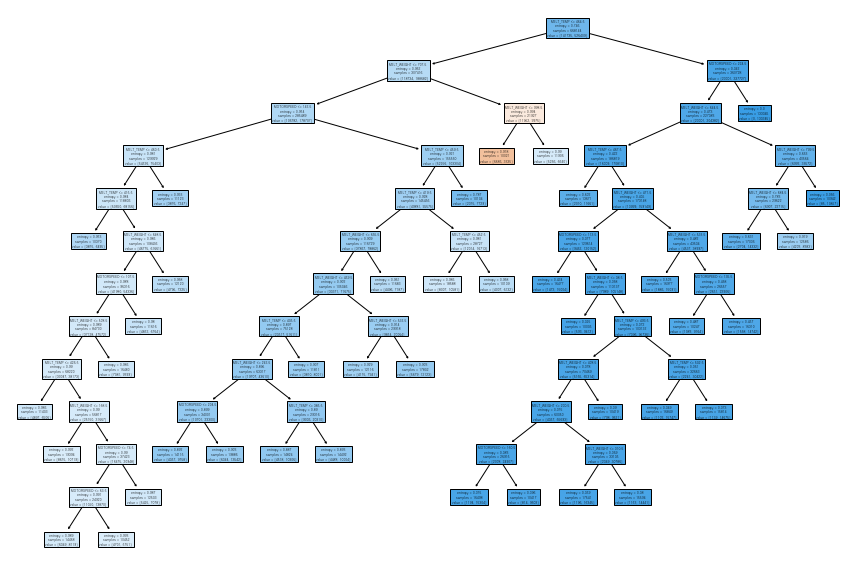

In [223]:
features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(cla_tree, feature_names=features, filled=True)
plt.savefig('tree1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

precision : 0.79492
recall : 0.99332
f1-score : 0.88311
accuracy : 0.79267
0.7926674489331641
[[  1576  33752]
 [   880 130828]]
0.9553894927536232



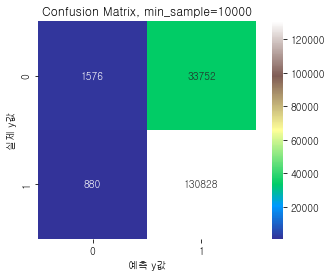

In [228]:
y_test_pred = cla_tree.predict(X_test_1)
y_train_pred = cla_tree.predict(X_train_1)

p = precision_score(y_test_1, y_test_pred)
print('precision : {:.5f}'.format(p))
r = recall_score(y_test_1, y_test_pred)
print('recall : {:.5f}'.format(r))
f1 = f1_score(y_test_1, y_test_pred)
print('f1-score : {:.5f}'.format(f1))
acc = accuracy_score(y_test_1, y_test_pred) 
print('accuracy : {:.5f}'.format(acc))
print(acc)

confusion_dt = confusion_matrix(y_test_1, y_test_pred)
print(confusion_dt)
print(confusion_dt[0][1] / (confusion_dt[0][0] + confusion_dt[0][1]))
print()
plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
plt.title("Confusion Matrix, min_sample=10000", size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
#     plt.savefig('사후확률_min_{}_수정_1.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

In [225]:
features = X.columns.tolist()
target = Y.columns.tolist()

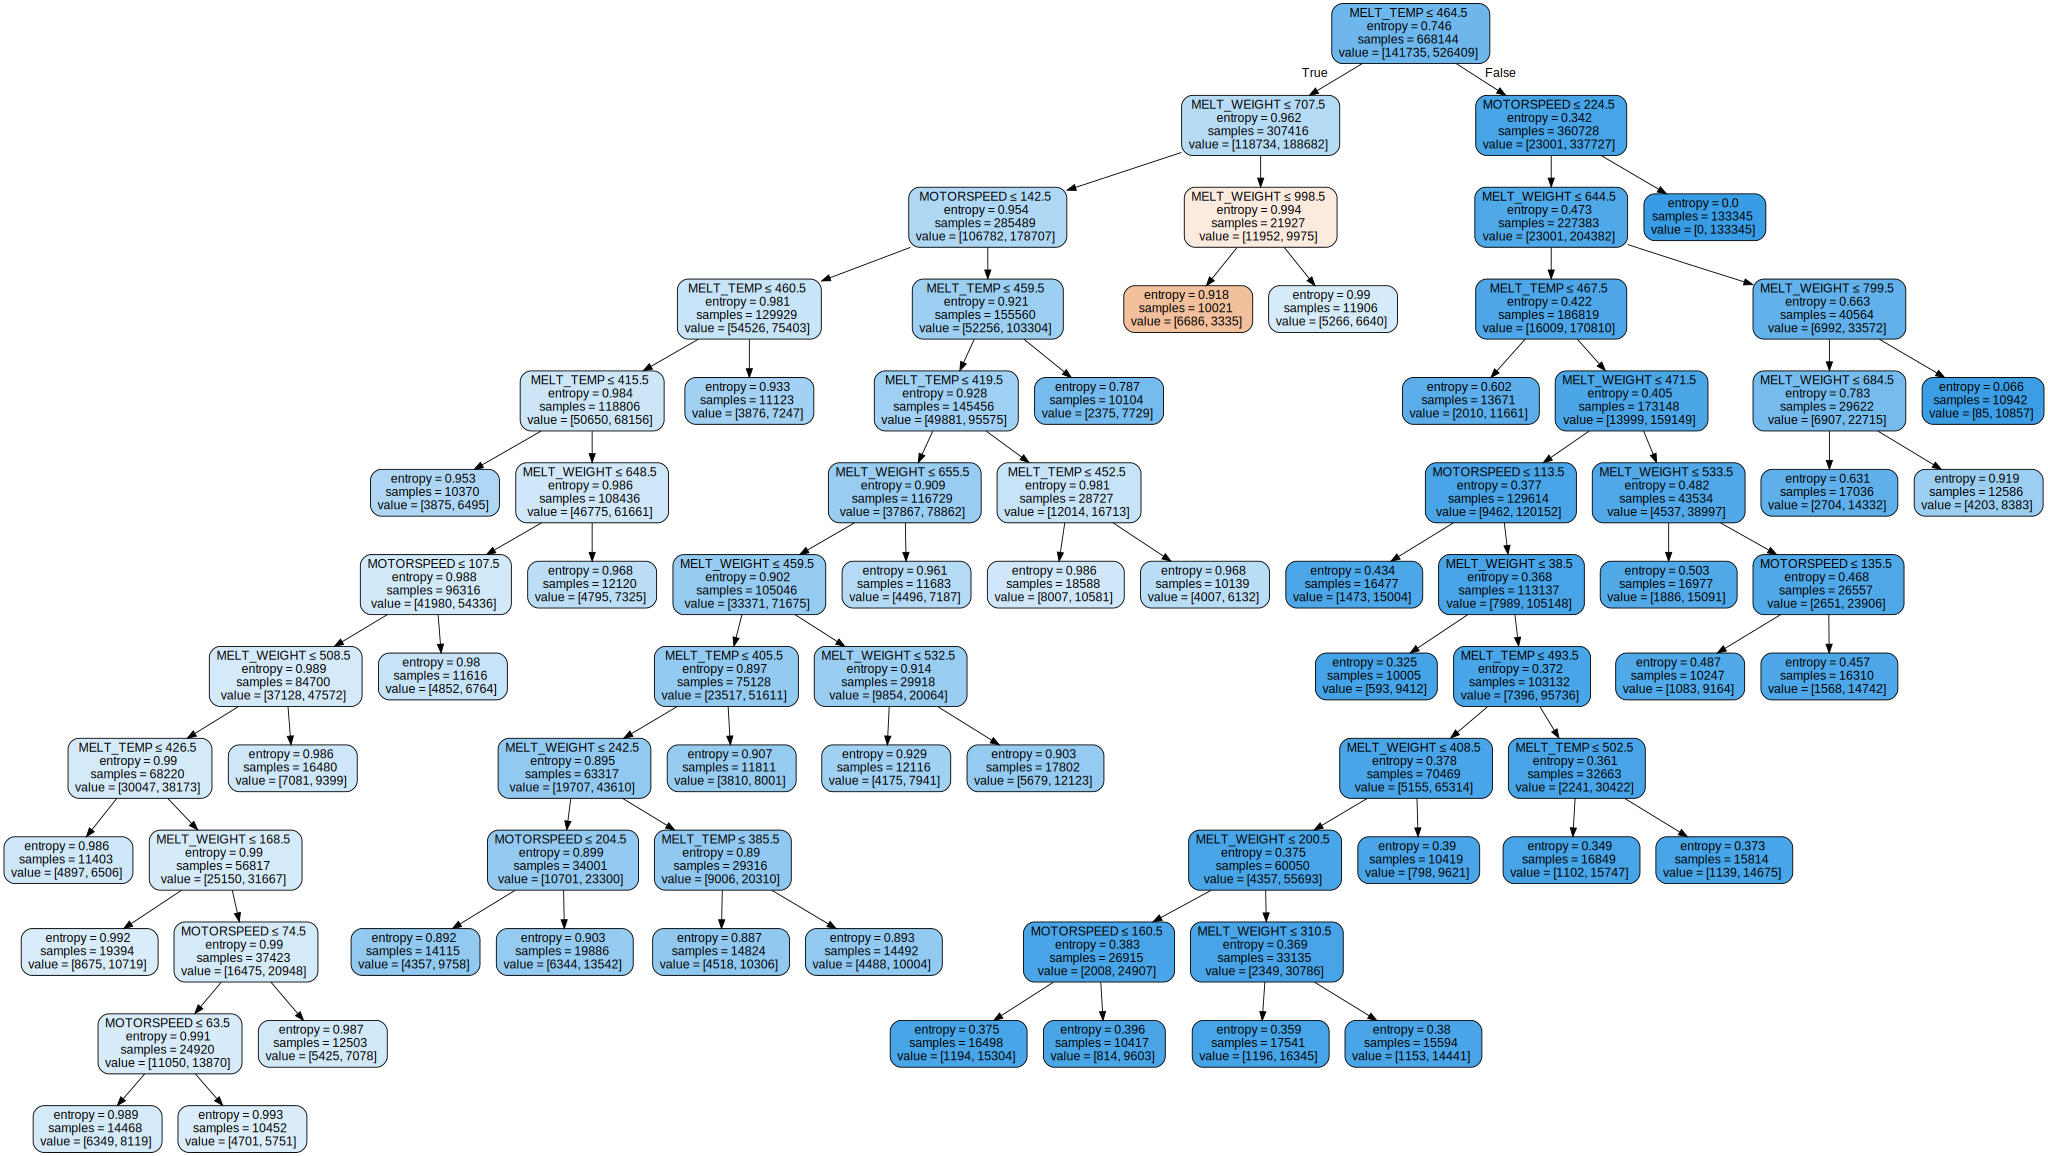

In [226]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(cla_tree,   # 의사결정나무 모형 대입
                           out_file = None,  # file로 변환할 것인가
                           feature_names = features,  # feature 이름
#                            class_names = target,  # target 이름
                           filled = True,           # 그림에 색상을 넣을것인가
                           rounded = True,          # 반올림을 진행할 것인가
                           special_characters = True, # 특수문자를 사용하나
                           impurity=True) 

graph = graphviz.Source(dot_data)              
# from IPython.core.display import Image
# Image(filename='./test.png')
graph

# graph.write_png('tree_with_path.png')

In [227]:
graph.render(filename='일반 트리', directory='./', format='png')

'일반 트리.png'